# *Introduction*

Penyakit kardiovaskular/*cardiovascular diseases* (CVD) merupakan penyebab kematian nomor 1 di dunia. Sekitar 17,9 juta jiwa meninggal setiap tahunnyanya, menyumbang 31% dari total kematian di dunia. 

Untuk mencegahnya, diperlukan pendeteksian dini untuk orang-orang yang beresiko tinggi mengidap penyakit kardiovaskular. Pendeteksian dini dapat dilakukan dengan menggunakan *machine learning*. Dan *machine learning* yang digunakan dapat dilatih menggunakan dataset "Heart Failure Detection" yang bersumber dari Kaggle. 

Dataset "Heart Failure Detection" berisi 299 baris data dan 13 kolom data. Salah satu kolom diantaranya berisi informasi kematian akibat penyakit kardiovaskular, sedangkan 12 kolom lainnya berisi informasi berupa faktor-faktor yang dapat digunakan untuk mendeteksi resiko terjadinya kematian tadi.


# *Import Libraries*

*Import* library-library yang dibutuhkan untuk komputasi, struktur data, visualisasi, dan *modelling*.

In [43]:
%pip install numpy pandas matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, naive_bayes, svm, neighbors, tree, ensemble
from sklearn.metrics import classification_report, confusion_matrix
import xgboost

# *Data Loading*

*Load* dataset ke dalam Pandas *dataframe*.

In [7]:
df = pd.read_csv('./datasets/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# *Data Cleaning*

Cek nilai kosong/*missing values* pada dataset.

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Diketahui Tidak ada *missing values* pada dataset sehingga tidak perlu dilakukan penghapusan data yang bernilai kosong.

# *Data Exploration*

Tetapkan kolom *target* (kolom yang diprediksi) dan kolom *feature* (kolom untuk memprediksi) yang akan digunakan untuk *modelling*.

In [9]:
target_col = 'DEATH_EVENT'
feature_cols = df.drop([target_col], axis=1).columns.to_list()

print('Target Column:', target_col)
print('Feature Columns:', ', '.join(feature_cols))

Target Column: DEATH_EVENT
Feature Columns: age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time


Cek jumlah baris dan kolom padaset.

In [10]:
df.shape

(299, 13)

Diketahui terdapat 299 baris dan 13 kolom pada dataset.

Cek *measures of central tendency* dari dataset, seperti mean, median, dan modus.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [12]:
df.mode().iloc[0]

age                             60.00
anaemia                          0.00
creatinine_phosphokinase       582.00
diabetes                         0.00
ejection_fraction               35.00
high_blood_pressure              0.00
platelets                   263358.03
serum_creatinine                 1.00
serum_sodium                   136.00
sex                              1.00
smoking                          0.00
time                           187.00
DEATH_EVENT                      0.00
Name: 0, dtype: float64

Cek *distribution* dan *variability* dari kolom-kolom dataset dengan histogram.

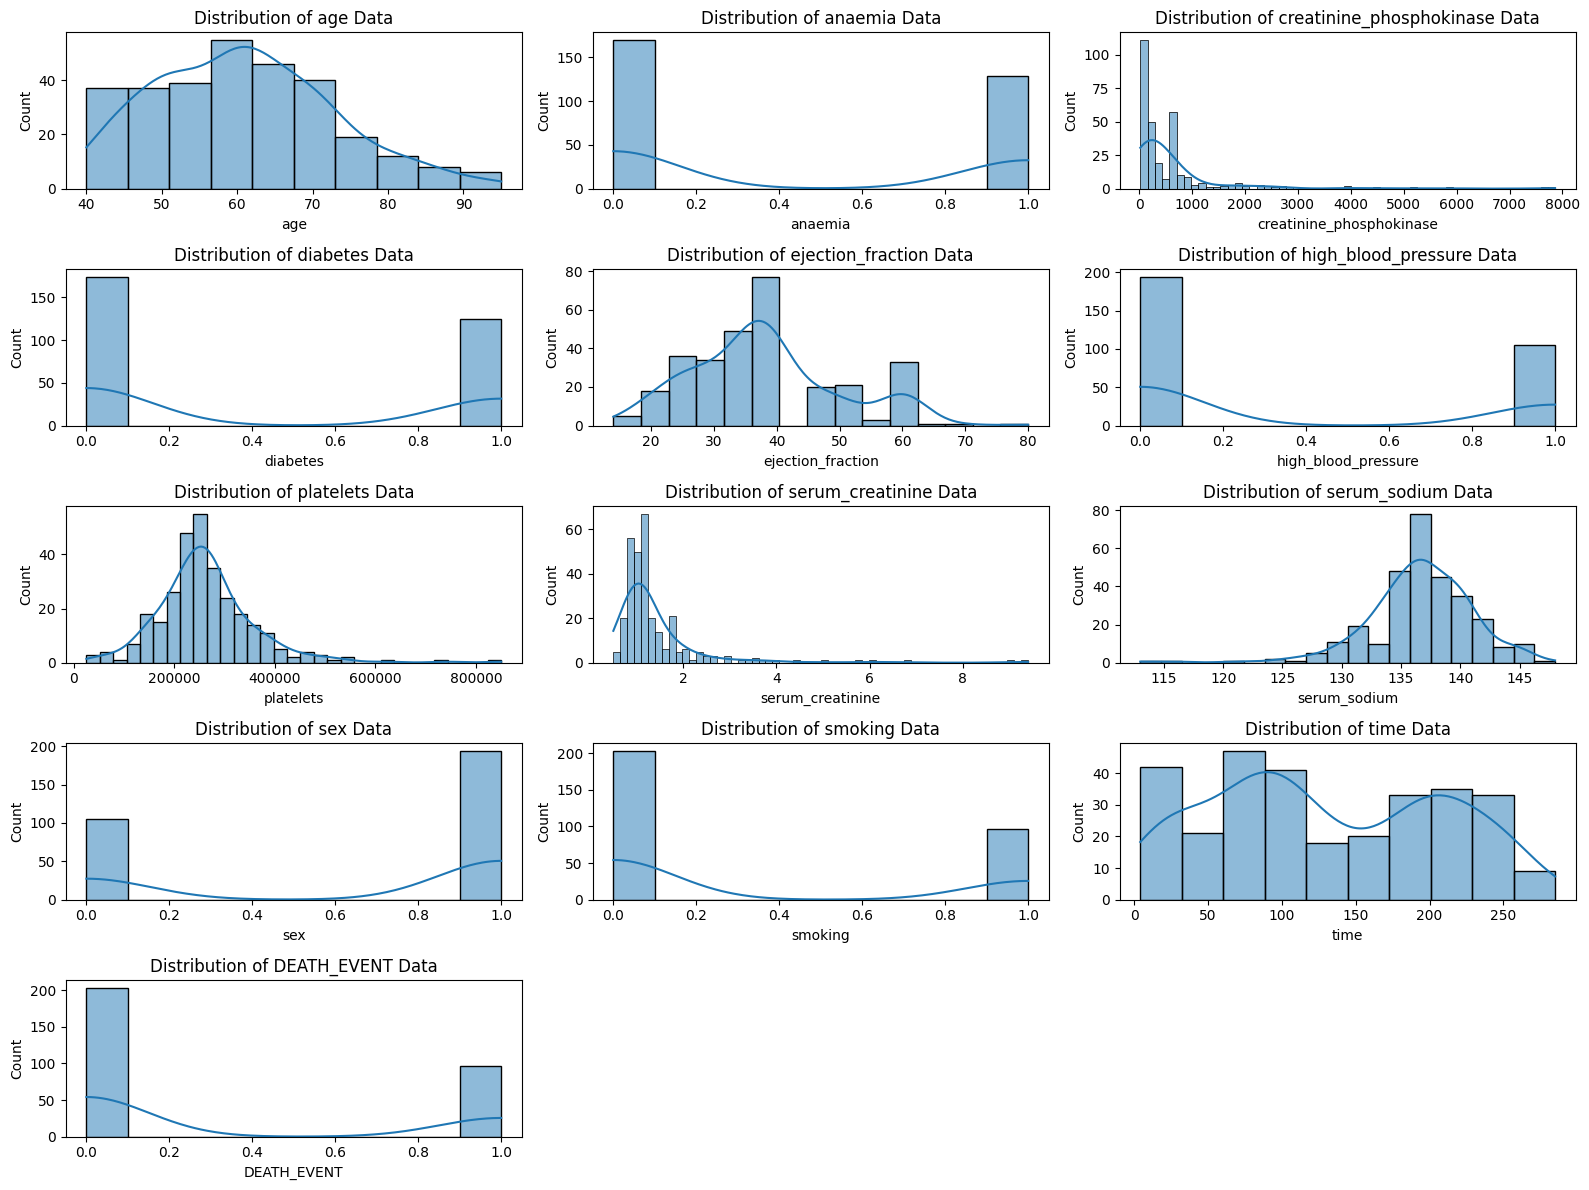

In [13]:
plt.figure(figsize=(16,12))
for i, col in enumerate(df.columns, 1):
  plt.subplot(5, 3, i)
  plt.title(f'Distribution of {col} Data')
  sns.histplot(data=df[col], kde=True)
  plt.tight_layout()
  plt.plot()

Terlihat kolom **creatinine_phosphokinase** dan **serum_creatinine** miring/*skew* secara signifikan.


Cek korelasi antara kolom *feature* dan kolom *target* (**DEATH EVENT**) dengan *heatmap*.

<AxesSubplot:>

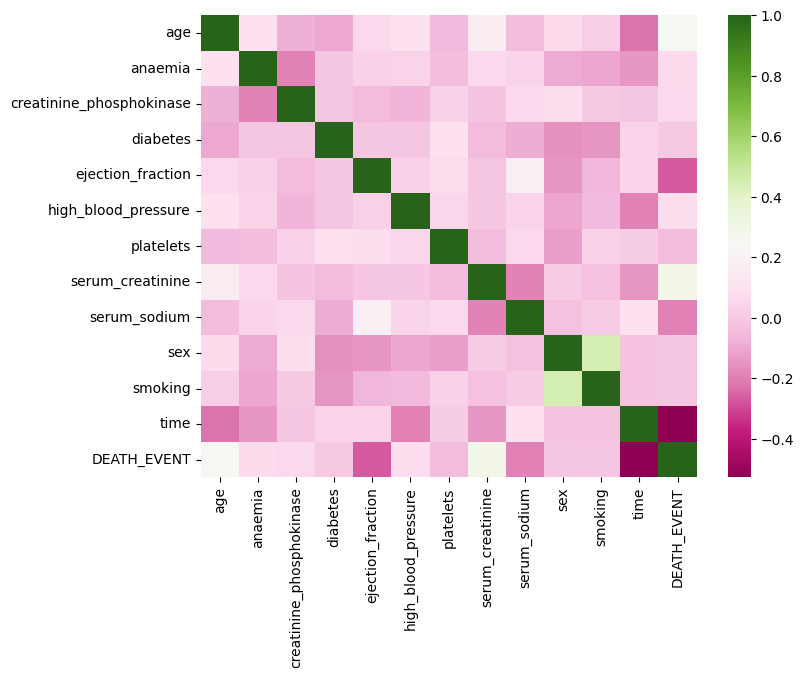

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='PiYG')

Terlihat kolom **time**, **ejection_fraction**, dan **sorum_sodium** merupakan 3 kolom dengan korelasi positif tertinggi terhadap kolom target (**DEATH EVENT**)

Cek *outlier* pada kolom-kolom data non-biner dengan *box plot*.

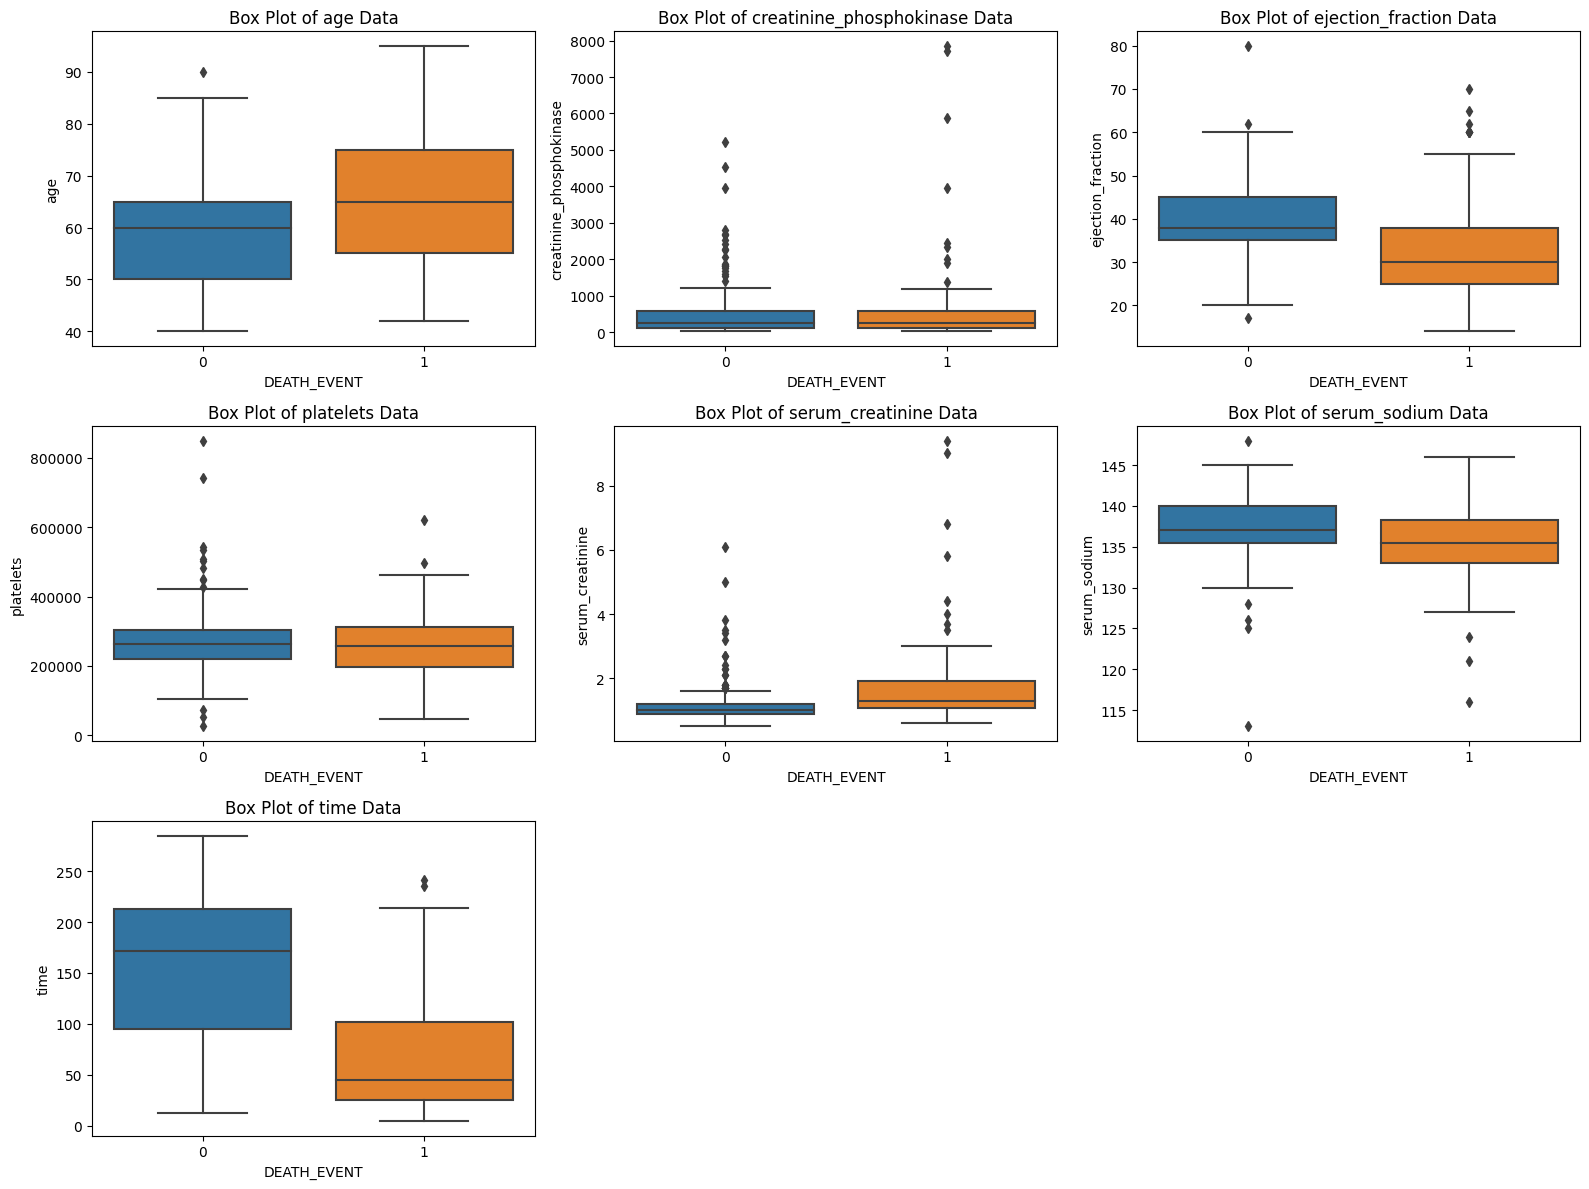

In [15]:
non_binary_cols = df.columns[df.isin((0,1)).all()]

plt.figure(figsize=(16,12))
for i, col in enumerate(df.drop(non_binary_cols, axis=1).columns, 1):
  plt.subplot(3, 3, i)
  plt.title(f'Box Plot of {col} Data')
  sns.boxplot(x=target_col, y=col, data=df)
  plt.tight_layout()
  plt.plot()

Terlihat terdapat beberapa *outlier* pada semua kolom data non-biner, akan tetapi *outlier* tersebut tidak perlu dihapus mengingat dibutuhkannya data yang besar untuk mendapatkan akurasi model yang bagus.

# *Data Preprocessing*

Pisahkan dataset menjadi dataset *target* dan dataset *feature*.

In [16]:
X = df[feature_cols]
y = df[target_col]

Lakukan *standardization* untuk dataset *feature*.

In [17]:
columns = list(X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=columns)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


Cek dataset feature yang telah ter-*standardized* dengan *box plot*.

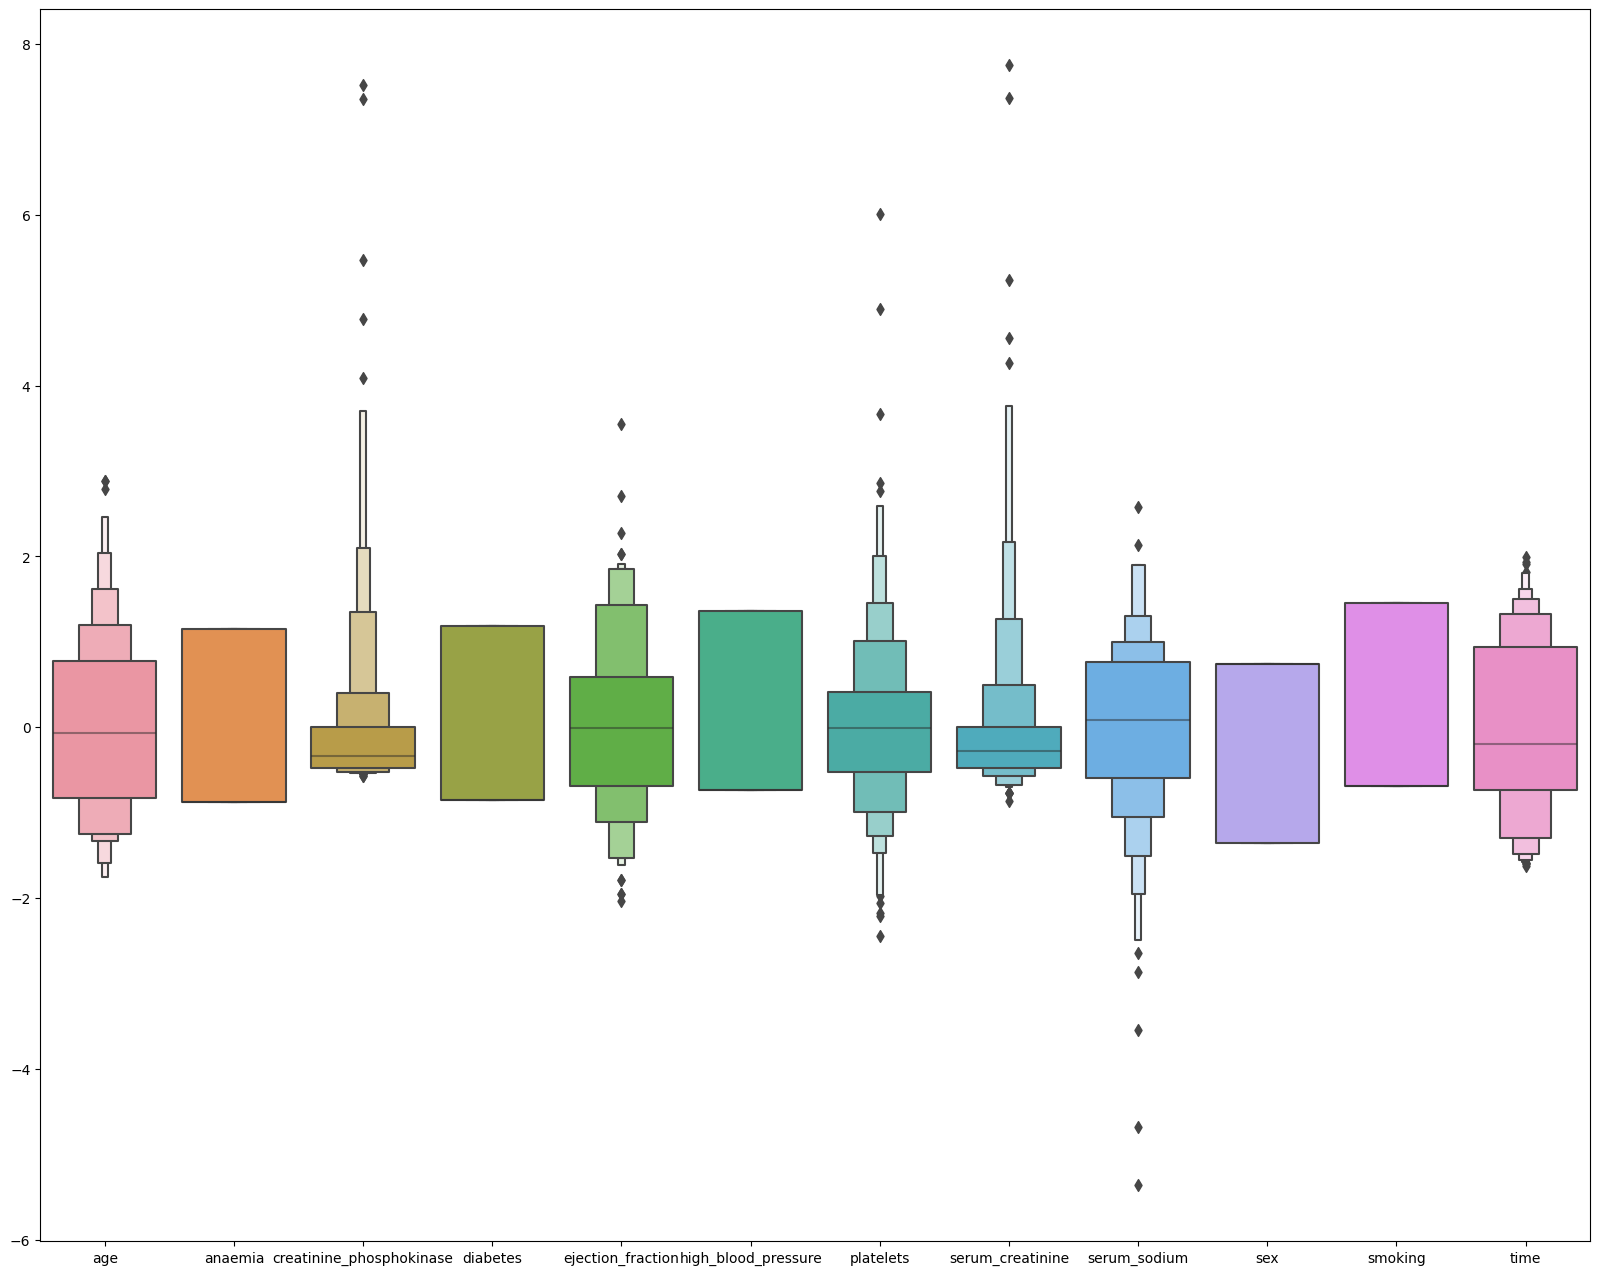

In [18]:
plt.figure(figsize=(20,16))
sns.boxenplot(data=X_scaled)
plt.show()

Terlihat semua kolom data yang ter-*standardize* memiliki median yang sama, yakni 0.

Pisahkan kembali dataset *target* dan dataset *feature* menjadi dataset *target* untuk *training*, dataset *target* untuk *testing*, dataset *feature* untuk *training*, dan dataset *feature* untuk *testing*.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)

# *Modelling*

In [20]:
def plot_confusion_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred1)
  plt.figure(figsize=(8,6))
  sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='PiYG', annot=True)
  plt.title('Confusion Matrix of Logistic Regression Model')
  plt.xticks(np.array(range(2))+0.5, ('Heart Not Failed', 'Heart Fail'))
  plt.yticks(np.array(range(2))+0.5, ('Heart Not Failed', 'Heart Fail'))
  plt.show()

## Logistic Regression

In [21]:
clf1 = linear_model.LogisticRegression()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
clf1_acc = clf1.score(X_test, y_test)

print('Accuracy of Logistic Regression: ', '{:.2f}%'.format(100* clf1_acc))

Accuracy of Logistic Regression:  84.44%


In [22]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        60
           1       0.77      0.77      0.77        30

    accuracy                           0.84        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90



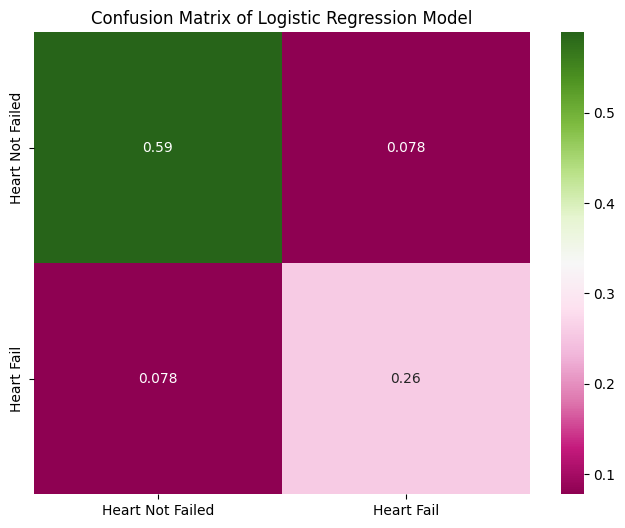

In [23]:
plot_confusion_matrix(y_test, y_pred1)

## K-Nearest Neighbors (KNN)

In [24]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=32)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
clf2_acc = clf2.score(X_test, y_test)

print('Accuracy of Logistic Regression: ', '{:.2f}%'.format(100* clf2_acc))

Accuracy of Logistic Regression:  72.22%


In [25]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.71      0.98      0.83        60
           1       0.86      0.20      0.32        30

    accuracy                           0.72        90
   macro avg       0.78      0.59      0.57        90
weighted avg       0.76      0.72      0.66        90



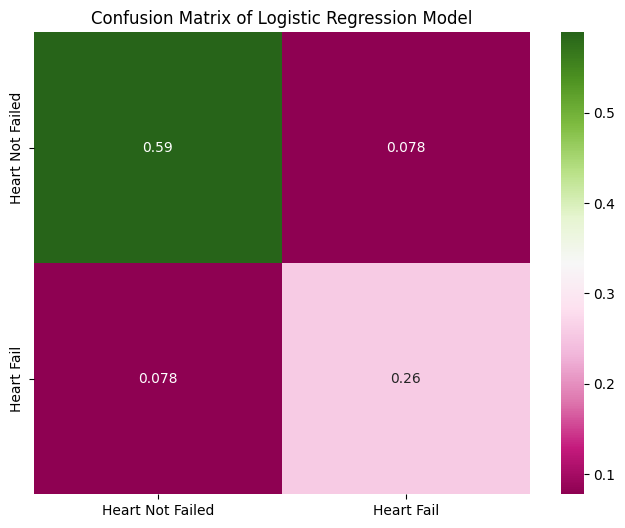

In [26]:
plot_confusion_matrix(y_test, y_pred2)

## SVM

In [27]:
clf3 = svm.SVC()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
clf3_acc = clf3.score(X_test, y_test)

print('Accuracy of SVM: ', '{:.2f}%'.format(100* clf3_acc))

Accuracy of SVM:  78.89%


In [28]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



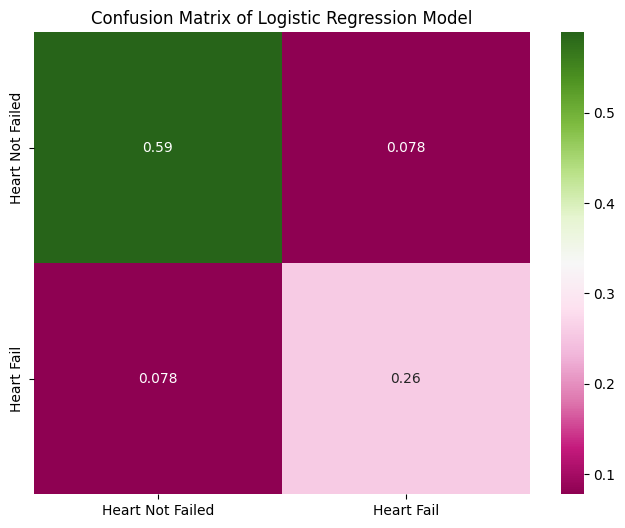

In [29]:
plot_confusion_matrix(y_test, y_pred3)

## Naive Bayes

In [30]:
clf4 = naive_bayes.GaussianNB()
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
clf4_acc = clf4.score(X_test, y_test)

print('Accuracy of Naive Bayes: ', '{:.2f}%'.format(100* clf4_acc))

Accuracy of Naive Bayes:  74.44%


In [31]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        60
           1       0.64      0.53      0.58        30

    accuracy                           0.74        90
   macro avg       0.71      0.69      0.70        90
weighted avg       0.74      0.74      0.74        90



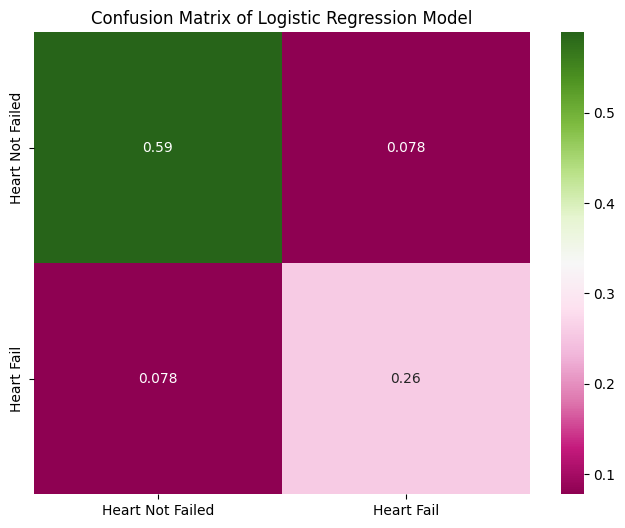

In [32]:
plot_confusion_matrix(y_test, y_pred4)

## Decision Tree

In [33]:
clf5 = tree.DecisionTreeClassifier(criterion='entropy')
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)
clf5_acc = clf5.score(X_test, y_test)

print('Accuracy of Decision Tree: ', '{:.2f}%'.format(100* clf5_acc))

Accuracy of Decision Tree:  77.78%


In [34]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        60
           1       0.69      0.60      0.64        30

    accuracy                           0.78        90
   macro avg       0.75      0.73      0.74        90
weighted avg       0.77      0.78      0.77        90



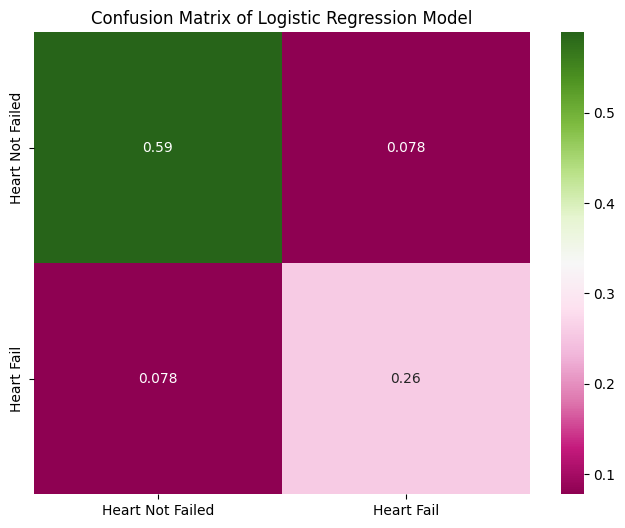

In [35]:
plot_confusion_matrix(y_test, y_pred5)

## Random Forest

In [36]:
clf6 = ensemble.RandomForestClassifier(n_estimators=200, criterion='entropy')
clf6.fit(X_train, y_train)
y_pred6 = clf6.predict(X_test)
clf6_acc = clf6.score(X_test, y_test)

print('Accuracy of Random Forest: ', '{:.2f}%'.format(100* clf6_acc))

Accuracy of Random Forest:  84.44%


In [37]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.81      0.70      0.75        30

    accuracy                           0.84        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.84      0.84      0.84        90



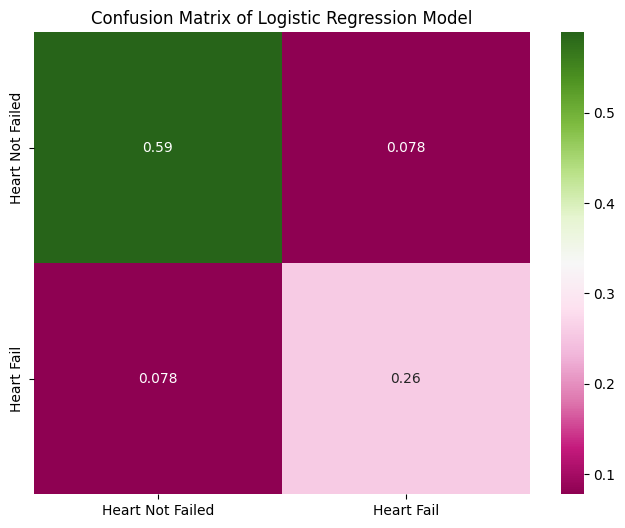

In [38]:
plot_confusion_matrix(y_test, y_pred6)

## XGBoost

In [39]:
clf7 = xgboost.XGBClassifier()
clf7.fit(X_train, y_train)
y_pred7 = clf7.predict(X_test)
clf7_acc = clf7.score(X_test, y_test)

print('Accuracy of Random Forest: ', '{:.2f}%'.format(100* clf7_acc))

Accuracy of Random Forest:  81.11%


In [40]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        60
           1       0.72      0.70      0.71        30

    accuracy                           0.81        90
   macro avg       0.79      0.78      0.79        90
weighted avg       0.81      0.81      0.81        90



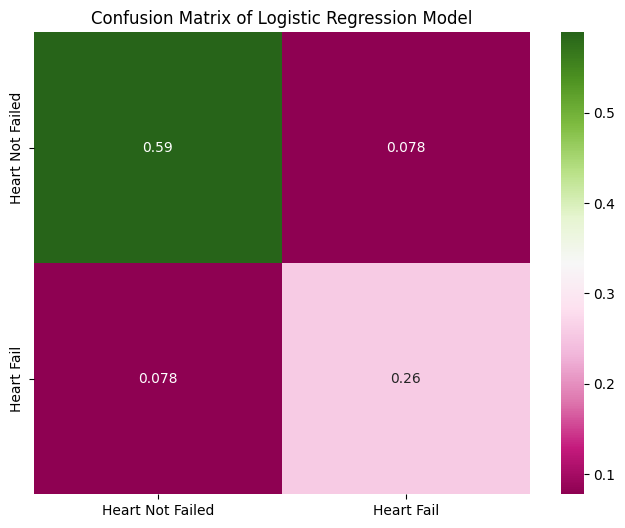

In [41]:
plot_confusion_matrix(y_test, y_pred7)